<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/ml_python.png' width=600/></center>

# 실습 내용



- 다양한 알고리즘으로 모델을 만들고 성능을 비교합니다.

# 1.환경 준비

- 기본 라이브러리와 대상 데이터를 가져와 이후 과정을 준비합니다.

In [1]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings(action='ignore')

In [2]:
# 데이터 불러오기
path = 'https://raw.githubusercontent.com/jangrae/csv/master/boston.csv'
data = pd.read_csv(path)

# 2.데이터 이해

- 분석할 데이터를 충분히 이해할 수 있도록 다양한 탐색 과정을 수행합니다.

In [3]:
# 데이터 살펴보기
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
# 기초통계정보 확인
data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# 3.데이터 준비

- 전처리 과정을 통해 머신러닝 알고리즘에 사용할 수 있는 형태의 데이터를 준비합니다.

**1) x, y 분리**

In [5]:
# target 확인
target = 'medv'

# 데이터 분리
x = data.drop(target, axis = 1)
y = data[target] 

**2) 정규화**

In [6]:
# 정규화
x = (x - x.min()) / (x.max() - x.min())

**3) 학습용, 평가용 데이터 분리**

In [7]:
# 모듈 불러오기
from sklearn.model_selection import train_test_split

# 7:3으로 분리
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2022)

# 4.모델링

- 본격적으로 모델을 선언하고 학습하고 평가하는 과정을 진행합니다.
- 다양한 알고리즘으로 모델을 만들고 성능을 확입니다.
- 성능 평가는 mean_absolute_error, r2_score를 사용합니다.
- 각 알고리즘별로 요구되는 내용을 숙지하면서 모델링을 진행합니다.

## 4.1.Linear Regression

- Linear Regression 알고리즘으로 모델링하고 성능을 확인합니다.

In [8]:
# 불러오기

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

In [9]:
# 선언하기

model = LinearRegression()

In [10]:
# 학습하기

model.fit(x_train, y_train)

LinearRegression()

In [11]:
# 예측하기

y_pred = model.predict(x_test)

In [12]:
# 평가하기

print('MAE :', mean_absolute_error(y_test, y_pred))
print('R2-Score :', r2_score(y_test, y_pred))

MAE : 3.4962689389088695
R2-Score : 0.7430693569118817


## 4.2.KNN

- KNN 알고리즘으로 모델링하고 성능을 확인합니다.
- 모델 선언시 n_neighbors=5를 지정합니다.

In [13]:
# 불러오기

from sklearn.neighbors import KNeighborsRegressor

In [14]:
# 선언하기

model = KNeighborsRegressor(n_neighbors=5)

In [15]:
# 학습하기

model.fit(x_train, y_train)

KNeighborsRegressor()

In [16]:
# 예측하기

y_pred = model.predict(x_test)

In [17]:
# 평가하기

print('MAE :', mean_absolute_error(y_test, y_pred))
print('R2-Score :', r2_score(y_test, y_pred))

MAE : 3.0527631578947365
R2-Score : 0.7860470863341451


## 4.3.Decision Tree

- Decision Tree 알고리즘으로 모델링하고 성능을 확인합니다.
- 모델 선언시 max_depth=10, random_state=2022을 지정합니다.

In [18]:
# 불러오기

from sklearn.tree import DecisionTreeRegressor

In [19]:
# 선언하기

model = DecisionTreeRegressor(max_depth=10, random_state=2022)

In [20]:
# 학습하기

model.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=10, random_state=2022)

In [21]:
# 예측하기

y_pred = model.predict(x_test)

In [22]:
# 평가하기

print('MAE :', mean_absolute_error(y_test, y_pred))
print('R2-Score :', r2_score(y_test, y_pred))

MAE : 3.3855986842105263
R2-Score : 0.7045721756033901


## 4.4.Random Forest

- Random Forest 알고리즘으로 모델링하고 성능을 확인합니다.
- 모델 선언시 max_depth=10, random_state=2022을 지정합니다.

In [23]:
# 1단계: 불러오기

from sklearn.ensemble import RandomForestRegressor

In [24]:
# 선언하기

model = RandomForestRegressor(max_depth=10, random_state=2022)

In [25]:
# 학습하기

model.fit(x_train, y_train)

RandomForestRegressor(max_depth=10, random_state=2022)

In [26]:
# 예측하기

y_pred = model.predict(x_test)

In [27]:
# 평가하기

print('MAE :', mean_absolute_error(y_test, y_pred))
print('R2-Score :', r2_score(y_test, y_pred))

MAE : 2.465881455087647
R2-Score : 0.8454412226909755


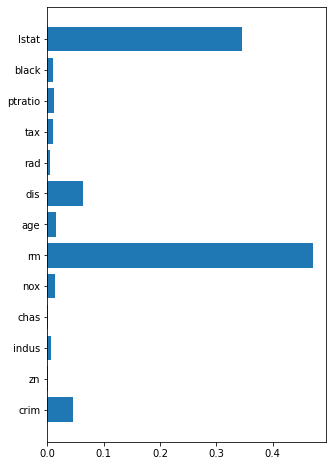

In [28]:
# 시각화

plt.figure(figsize=(5, 8))
plt.barh(list(x), model.feature_importances_)
plt.show()

## 4.5.XGBoost

- XGBoost 알고리즘으로 모델링하고 성능을 확인합니다.
- 모델 선언시 max_depth=10, random_state=2022를 지정합니다.

In [29]:
# 불러오기

from xgboost import XGBRegressor

In [30]:
# 선언하기

modell = XGBRegressor(max_depth=10, random_state=2022)

In [31]:
# 학습하기

model.fit(x_train, y_train)

RandomForestRegressor(max_depth=10, random_state=2022)

In [32]:
# 예측하기

y_pred = model.predict(x_test)

In [33]:
# 평가하기

print('MAE :', mean_absolute_error(y_test, y_pred))
print('R2-Score :', r2_score(y_test, y_pred))

MAE : 2.465881455087647
R2-Score : 0.8454412226909755
